# Import necessary libraries

In [351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import warnings

In [352]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# Load data
df = pd.read_csv('data2_train.csv')

# Basic data exploration

In [353]:
# Display the first few rows of the dataset
print(df.head())

   Feature_1   Feature_2  Target
0   8.160646   88.799326       0
1  31.149536  102.335826       0
2  13.103383   92.902908       0
3  15.950445   77.412565       0
4  35.856965   94.441550       0


In [354]:
# Display the shape of the dataset
print(df.shape)

(800, 3)


In [355]:
# Display information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  800 non-null    float64
 1   Feature_2  800 non-null    float64
 2   Target     800 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 18.9 KB
None


In [356]:
# Display summary statistics
print(df.describe())

        Feature_1   Feature_2      Target
count  800.000000  800.000000  800.000000
mean    33.685050   63.058641    0.476250
std     11.054919   26.940283    0.499748
min      0.102781    5.517599    0.000000
25%     26.125359   37.469336    0.000000
50%     33.844965   68.657961    0.000000
75%     41.613913   87.467784    1.000000
max     67.524338  129.865574    1.000000


In [357]:
# check for the duplicates
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


In [358]:
# Class distribution
print(df['Target'].value_counts())

Target
0    419
1    381
Name: count, dtype: int64


# Data visualization

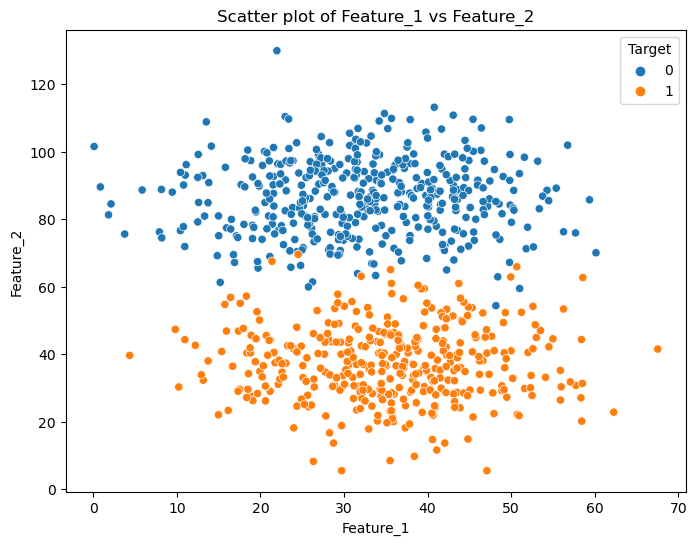

In [359]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['Target'])
plt.title('Scatter plot of Feature_1 vs Feature_2')
plt.show()

In [360]:
# Function to remove outliers
def no_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

In [361]:
# Remove outliers
df = no_outliers(df, ['Feature_1', 'Feature_2'])

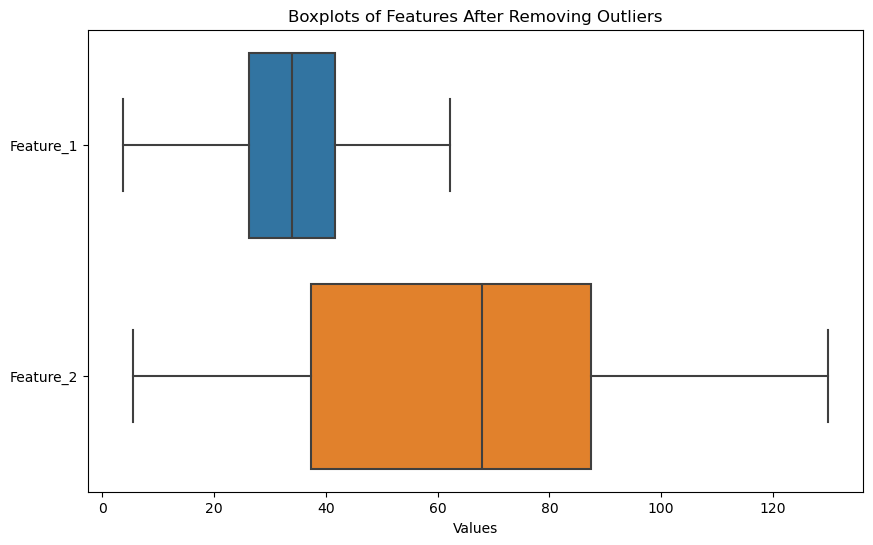

In [362]:
# Boxplot after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['Target']), orient='h')
plt.title('Boxplots of Features After Removing Outliers')
plt.xlabel('Values')
plt.show()

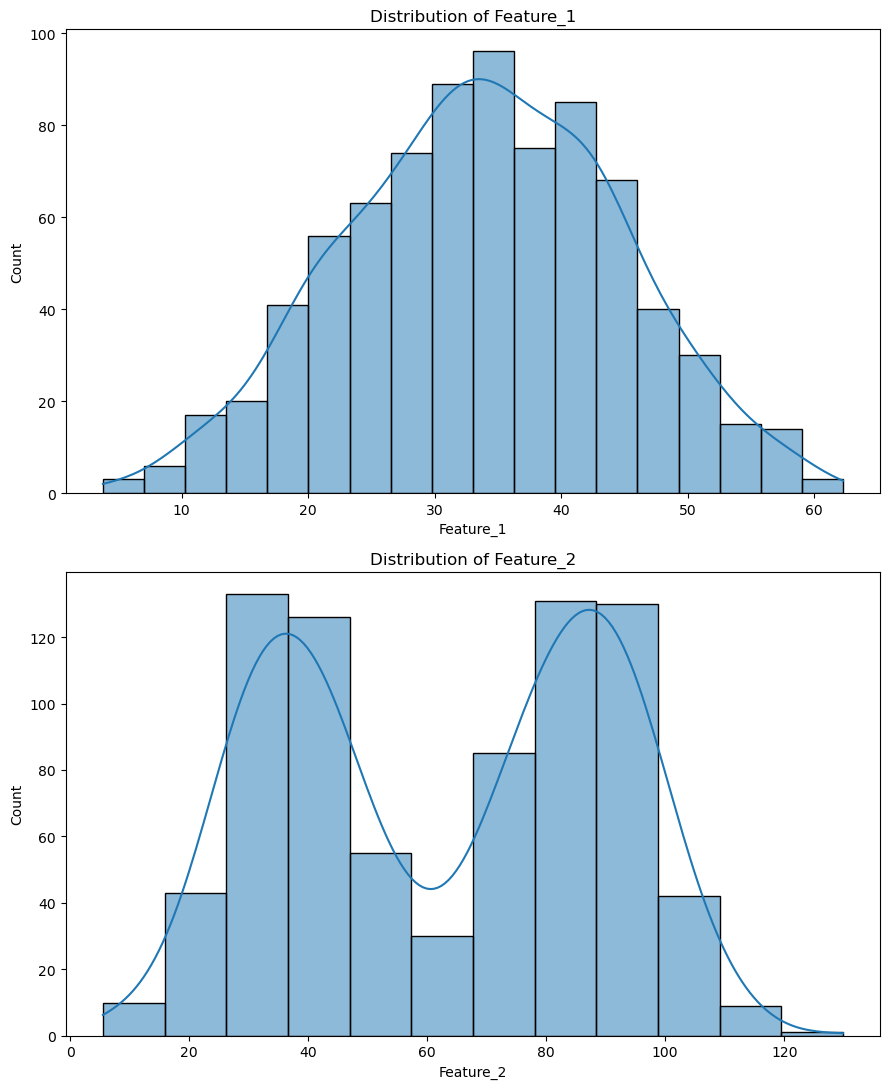

In [363]:
# Distribution plots
plt.figure(figsize=(9, 11))

plt.subplot(2, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(2, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.tight_layout()
plt.show()

In [364]:
# Feature scaling 
scaler = StandardScaler()
df[['Feature_1', 'Feature_2']] = scaler.fit_transform(df[['Feature_1', 'Feature_2']])

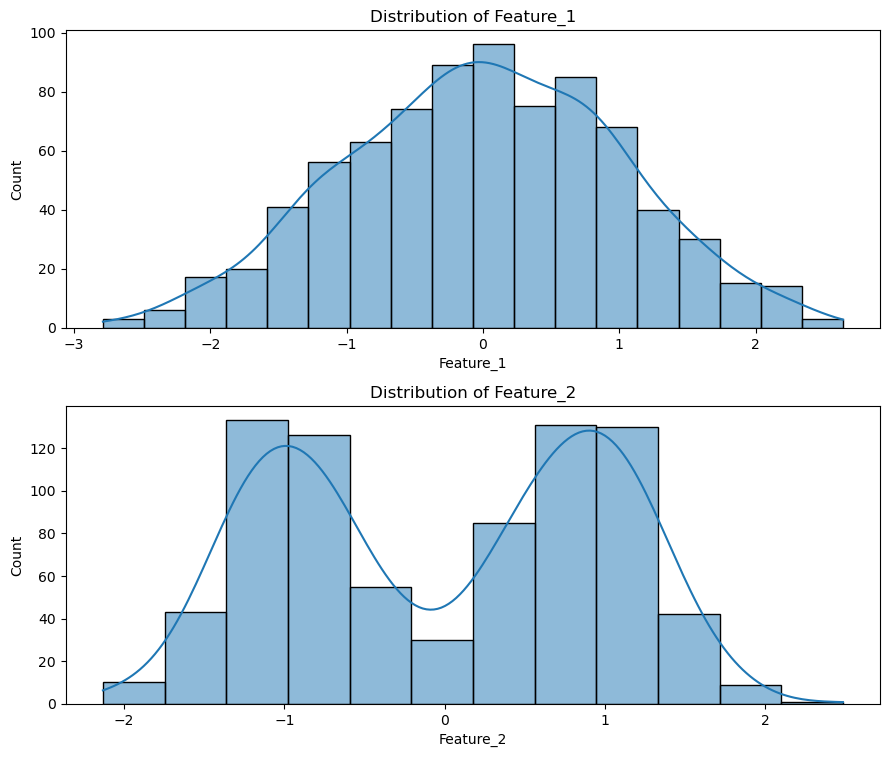

In [365]:
# Distribution plots after scaling
plt.figure(figsize=(9, 11))

plt.subplot(3, 1, 1)
sns.histplot(df['Feature_1'], kde=True)
plt.title('Distribution of Feature_1')

plt.subplot(3, 1, 2)
sns.histplot(df['Feature_2'], kde=True)
plt.title('Distribution of Feature_2')

plt.tight_layout()
plt.show()

In [366]:
# Check skewness
print(f"Skewness of Feature_1: {df['Feature_1'].skew()}")
print(f"Skewness of Feature_2: {df['Feature_2'].skew()}")

Skewness of Feature_1: -0.05555586365542708
Skewness of Feature_2: -0.06251770393589874


In [367]:
# Data split
X = df[['Feature_1', 'Feature_2']]
y = df['Target']

In [368]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [369]:
# Load test data
df_test = pd.read_csv('data2_test.csv')
print(df_test.head())
X_test = df_test[['Feature_1', 'Feature_2']]
y_test = df_test['Target'].values
X_test = scaler.transform(X_test)

   Feature_1  Feature_2  Target
0  48.489576  81.609641       0
1  26.069706  89.783100       0
2  31.967447  88.005024       0
3  44.957613  91.219129       0
4  27.681870  87.381969       0


In [370]:
# Function to ensure data is a numpy array
def ensure_numpy_array(data):
    if isinstance(data, pd.DataFrame):
        return data.to_numpy()
    elif isinstance(data, np.ndarray):
        return data
    elif isinstance(data, (pd.Series, list)):
        return np.array(data)
    else:
        raise ValueError("Unsupported data type")

In [371]:
X_train = ensure_numpy_array(X_train)
X_val = ensure_numpy_array(X_val)
Y_train = ensure_numpy_array(Y_train)
Y_val = ensure_numpy_array(Y_val)

# Using Neural Network Model

## Fundamental Principles, Assumptions, and Equations Involved

A neural network is a computational model inspired by the way biological neural networks in the human brain process information. It consists of interconnected nodes (neurons) organized in layers: an input layer, one or more hidden layers, and an output layer. The fundamental principles of a neural network involve the following components and steps:

- **Neurons and Layers**:
  - Each neuron receives one or more inputs, processes them, and passes the output to the next layer.
  - The neurons are organized in layers: input layer, hidden layers, and output layer.
  
- **Weights and Biases**:
  - Each connection between neurons has a weight that determines the strength and direction of the connection.
  - Each neuron also has an associated bias that shifts the activation function.
  
- **Activation Function**:
  - The activation function introduces non-linearity into the model. Common activation functions include the sigmoid, tanh, and ReLU (Rectified Linear Unit).
  
- **Forward Propagation**:
  - In forward propagation, inputs are passed through the network layer by layer to generate the output.
  
- **Loss Function**:
  - The loss function quantifies the difference between the predicted output and the true output. For binary classification, the cross-entropy loss function is commonly used.
  
- **Backpropagation and Gradient Descent**:
  - Backpropagation calculates the gradient of the loss function with respect to each weight by the chain rule, layer by layer backward from the output layer to the input layer.
  - Gradient descent updates the weights to minimize the loss function.

## Mathematical Equations

### Forward Propagation

For a neural network with one hidden layer:

$$
\mathbf{z}^{(1)} = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{b}^{(1)}
$$

$$
\mathbf{a}^{(1)} = \sigma(\mathbf{z}^{(1)})
$$

$$
\mathbf{z}^{(2)} = \mathbf{a}^{(1)} \mathbf{W}^{(2)} + \mathbf{b}^{(2)}
$$

$$
\mathbf{a}^{(2)} = \sigma(\mathbf{z}^{(2)})
$$

where:
- $\mathbf{X}$ is the input matrix.
- $\mathbf{W}^{(1)}$ and $\mathbf{W}^{(2)}$ are weight matrices for the hidden and output layers, respectively.
- $\mathbf{b}^{(1)}$ and $\mathbf{b}^{(2)}$ are bias vectors for the hidden and output layers, respectively.
- $\sigma$ is the activation function (e.g., sigmoid function).

### Cross-Entropy Loss

$$
L(\mathbf{y}, \mathbf{\hat{y}}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

where:
- $\mathbf{y}$ is the true label.
- $\mathbf{\hat{y}}$ is the predicted label.
- $N$ is the number of samples.

### Backpropagation

$$
\delta^{(2)} = \mathbf{a}^{(2)} - \mathbf{y}
$$

$$
\frac{\partial L}{\partial \mathbf{W}^{(2)}} = \mathbf{a}^{(1)T} \delta^{(2)}
$$

$$
\frac{\partial L}{\partial \mathbf{b}^{(2)}} = \sum \delta^{(2)}
$$

$$
\delta^{(1)} = (\delta^{(2)} \mathbf{W}^{(2)}) \sigma'(\mathbf{z}^{(1)})
$$

$$
\frac{\partial L}{\partial \mathbf{W}^{(1)}} = \mathbf{X}^T \delta^{(1)}
$$

$$
\frac{\partial L}{\partial \mathbf{b}^{(1)}} = \sum \delta^{(1)}
$$

## How the Model Learns from Data and Makes Predictions

1. **Initialization**:
   - Initialize weights and biases randomly or using a specific initialization method.

2. **Forward Pass**:
   - Pass input data through the network to get predictions.

3. **Compute Loss**:
   - Calculate the loss using the cross-entropy loss function.

4. **Backward Pass**:
   - Perform backpropagation to compute gradients of the loss with respect to weights and biases.

5. **Update Weights**:
   - Update weights and biases using gradient descent or other optimization algorithms.

6. **Repeat**:
   - Repeat steps 2-5 for a number of epochs or until convergence.


In [372]:
# Neural Network class
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.weights1 = np.random.rand(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.rand(self.hidden_dim, self.output_dim)
        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def cross_entropy_loss(self, y_true, y_pred):
        n_samples = y_true.shape[0]
        logp = - np.log(y_pred[np.arange(n_samples), y_true])
        loss = np.sum(logp) / n_samples
        return loss

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = y.shape[0]
        y = y.reshape(-1, 1)  # Ensure y is a numpy array and reshaped correctly
        d_loss_output = output - y
        d_output_z2 = self.sigmoid_derivative(output)
        d_z2_weights2 = self.a1.T
        d_loss_weights2 = np.dot(d_z2_weights2, d_loss_output * d_output_z2)
        d_loss_bias2 = np.sum(d_loss_output * d_output_z2, axis=0, keepdims=True)
        d_loss_a1 = np.dot(d_loss_output * d_output_z2, self.weights2.T)
        d_a1_z1 = self.sigmoid_derivative(self.a1)
        d_z1_weights1 = X.T
        d_loss_weights1 = np.dot(d_z1_weights1, d_loss_a1 * d_a1_z1)
        d_loss_bias1 = np.sum(d_loss_a1 * d_a1_z1, axis=0, keepdims=True)

        self.weights1 -= self.learning_rate * d_loss_weights1
        self.bias1 -= self.learning_rate * d_loss_bias1
        self.weights2 -= self.learning_rate * d_loss_weights2
        self.bias2 -= self.learning_rate * d_loss_bias2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int).flatten()

    def grid_search(self,X_train, y_train, X_val, y_val, param_grid):
        best_acc = 0
        best_params = {}

        for params in ParameterGrid(param_grid):
            nn = NeuralNetwork(input_dim=X_train.shape[1], hidden_dim=params['hidden_dim'], output_dim=1, learning_rate=params['learning_rate'])
            nn.train(X_train, y_train, params['epochs'])
            y_pred = nn.predict(X_val)
            acc = np.mean(y_pred == y_val)
            if acc > best_acc:
                best_acc = acc
                best_params = params

        return best_params, best_acc

In [373]:
# Instantiate the neural network
nn = NeuralNetwork(input_dim=2, hidden_dim=4, output_dim=1, learning_rate=0.01)

In [374]:
# Hyperparameters to tune
param_grid = {
    'hidden_dim': [4, 8, 16],
    'learning_rate': [0.01, 0.005, 0.001],
    'epochs': [1000, 2000, 3000]
}
# Hyperparameter tuning
best_params, best_acc = nn.grid_search(X_train, Y_train, X_val, Y_val, param_grid)
print(f"Best parameters: {best_params}, Best Validation Accuracy: {best_acc}")

Best parameters: {'epochs': 1000, 'hidden_dim': 4, 'learning_rate': 0.01}, Best Validation Accuracy: 0.99581589958159


In [375]:
# Training final model with best hyperparameters
nn = NeuralNetwork(input_dim=2, hidden_dim=best_params['hidden_dim'], output_dim=1, learning_rate=best_params['learning_rate'])
nn.train(X_train, Y_train, best_params['epochs'])

In [376]:
# Testing final model
y_pred = nn.predict(X_test)
test_acc = np.mean(y_pred == y_test)
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.99


# Training and testing the model using Tensorflow

In [377]:
# TensorFlow implementation for comparison
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [378]:
# Train the model
model.fit(X_train, Y_train, epochs=50, batch_size=16, validation_data=(X_val, Y_val))

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8151 - loss: 0.6005 - val_accuracy: 0.9874 - val_loss: 0.3974
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9787 - loss: 0.3442 - val_accuracy: 0.9916 - val_loss: 0.1883
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9869 - loss: 0.1680 - val_accuracy: 0.9916 - val_loss: 0.0846
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9915 - loss: 0.0859 - val_accuracy: 0.9958 - val_loss: 0.0498
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9822 - loss: 0.0625 - val_accuracy: 0.9916 - val_loss: 0.0372
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9877 - loss: 0.0395 - val_accuracy: 0.9916 - val_loss: 0.0299
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9863 - loss: 0.0409 - val_accuracy: 0.9916 - val_loss: 0.0271
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9915 - loss: 0.0374 - val_accuracy: 0.9916 - val_loss

In [379]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9944 - loss: 0.0214 
Test accuracy: 0.9900000095367432
